# This completes the unsupervised-insurance.ipynb file

In [187]:
import numpy as np
import pandas as pd

# Importing Data

In [188]:
insurance = pd.read_csv('supervised-lerning-data-insurance.csv')
insurance.head()

,Seniority,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Weight,Cluster
0,4,80,599,7068.00,0,1,190,0
1,15,85,1229,16030.00,5,1,1105,2
2,3,6,74,1261.82,0,1,87,0
3,3,6,244,3000.00,0,1,92,0
4,13,87,1598,9927.00,4,1,1055,2


# Data Information

In [189]:
insurance.shape

(39802, 8)

In [190]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39802 entries, 0 to 39801
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Seniority          39802 non-null  int64  
 1   Power              39802 non-null  int64  
 2   Cylinder_capacity  39802 non-null  int64  
 3   Value_vehicle      39802 non-null  float64
 4   N_doors            39802 non-null  int64  
 5   Type_fuel          39802 non-null  int64  
 6   Weight             39802 non-null  int64  
 7   Cluster            39802 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 2.4 MB


In [191]:
insurance.isnull().sum()

Seniority            0
Power                0
Cylinder_capacity    0
Value_vehicle        0
N_doors              0
Type_fuel            0
Weight               0
Cluster              0
dtype: int64

In [192]:
insurance.duplicated().sum()

0

In [193]:
insurance.describe()

,Seniority,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Weight,Cluster
count,39802.000000,39802.000000,39802.000000,39802.000000,39802.000000,39802.000000,39802.000000,39802.000000
mean,6.394352,96.445631,1647.587935,19223.823407,4.114416,1.614693,1218.554344,1.595699
std,6.269033,36.841635,582.633198,9594.815367,1.421487,0.486674,424.344352,0.612426
min,1.000000,4.000000,49.000000,270.460000,0.000000,1.000000,50.000000,0.000000
25%,2.000000,75.000000,1390.000000,13540.810000,3.000000,1.000000,1060.000000,1.000000
50%,4.000000,95.000000,1598.000000,18194.000000,5.000000,2.000000,1228.000000,2.000000
75%,8.000000,115.000000,1968.000000,23474.150000,5.000000,2.000000,1410.000000,2.000000
max,40.000000,580.000000,7480.000000,220675.800000,6.000000,2.000000,7300.000000,2.000000


# Unbalanced data procissing

In [194]:
from sklearn.utils import resample

In [195]:
insurance['Cluster'].value_counts()

Cluster
2    26381
1    10750
0     2671
Name: count, dtype: int64

In [196]:
# Identifier le nombre minimum d'observations par cluster
min_observation_count = insurance['Cluster'].value_counts().min()

In [197]:
# Créer une liste pour stocker les DataFrames équilibrés
balanced_dfs = []

# Boucler sur chaque cluster
for cluster_label, group in insurance.groupby('Cluster'):
    # Sous-échantillonner le cluster pour atteindre le nombre minimum d'observations
    balanced_cluster = resample(group, replace=False, n_samples=min_observation_count, random_state=42)
    
    # Ajouter le cluster équilibré à la liste
    balanced_dfs.append(balanced_cluster)

# Concaténer les DataFrames équilibrés pour créer un DataFrame équilibré
balanced_insurance = pd.concat(balanced_dfs, ignore_index=True)

# Afficher la distribution des clusters dans le nouveau DataFrame
print(balanced_insurance['Cluster'].value_counts())

Cluster
0    2671
1    2671
2    2671
Name: count, dtype: int64


In [198]:
balanced_insurance

,Seniority,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Weight,Cluster
0,5,39,296,5999.00,0,1,174,0
1,11,27,249,3880.00,0,1,190,0
2,4,11,125,2930.00,0,1,116,0
3,2,53,510,8690.00,0,1,123,0
4,2,15,125,3099.00,0,1,172,0
...,...,...,...,...,...,...,...,...
8008,1,60,1124,10690.00,5,1,910,2
8009,3,80,1360,14510.00,5,2,1089,2
8010,8,70,1398,13580.00,5,2,1130,2
8011,2,90,1598,14965.20,5,1,1055,2


#  new data resulte information and explring data

# data informaion

In [199]:
balanced_insurance.shape

(8013, 8)

In [200]:
balanced_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8013 entries, 0 to 8012
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Seniority          8013 non-null   int64  
 1   Power              8013 non-null   int64  
 2   Cylinder_capacity  8013 non-null   int64  
 3   Value_vehicle      8013 non-null   float64
 4   N_doors            8013 non-null   int64  
 5   Type_fuel          8013 non-null   int64  
 6   Weight             8013 non-null   int64  
 7   Cluster            8013 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 500.9 KB


In [201]:
balanced_insurance.describe()

,Seniority,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Weight,Cluster
count,8013.000000,8013.000000,8013.000000,8013.000000,8013.000000,8013.000000,8013.000000,8013.000000
mean,5.992887,82.824535,1350.855859,16928.737696,2.927618,1.471484,977.776987,1.000000
std,6.044503,52.204437,876.732637,12475.763243,2.195739,0.499217,654.220517,0.816548
min,1.000000,4.000000,49.000000,270.460000,0.000000,1.000000,50.000000,0.000000
25%,2.000000,40.000000,499.000000,6382.750000,0.000000,1.000000,185.000000,0.000000
50%,4.000000,90.000000,1560.000000,16350.000000,4.000000,1.000000,1164.000000,1.000000
75%,7.000000,115.000000,1968.000000,24500.000000,5.000000,2.000000,1430.000000,2.000000
max,40.000000,510.000000,6788.000000,170323.000000,6.000000,2.000000,7300.000000,2.000000


In [202]:
balanced_insurance['Cluster'].value_counts()

Cluster
0    2671
1    2671
2    2671
Name: count, dtype: int64

# exploring data

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

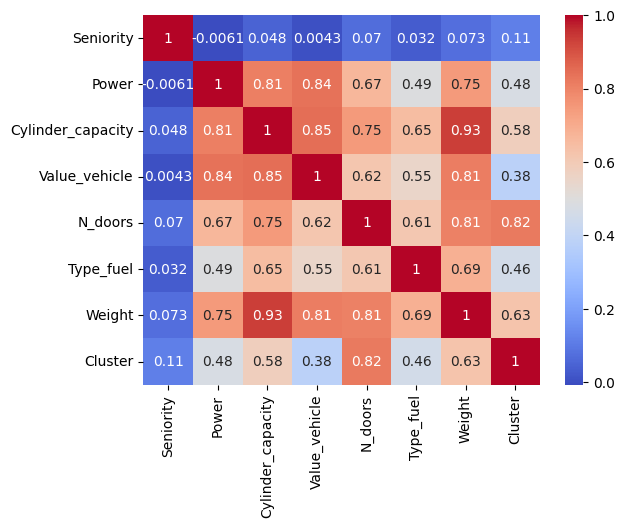

In [204]:
corr_feature = balanced_insurance.corr()
sns.heatmap(corr_feature,annot=True,cbar=True, cmap='coolwarm')

/tmp/ipykernel_14901/150754096.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balanced_insurance['Value_vehicle'])


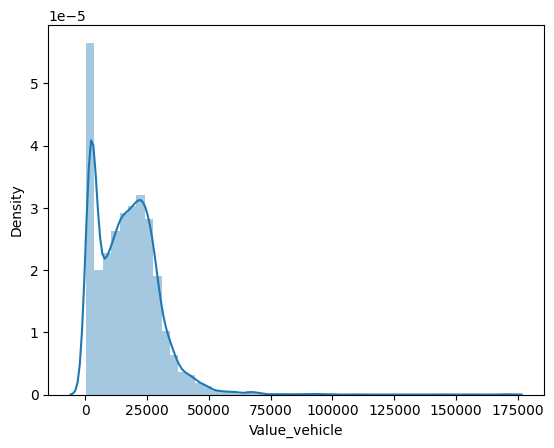

In [205]:
sns.distplot(balanced_insurance['Value_vehicle'])
plt.show()

/tmp/ipykernel_14901/3247812088.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balanced_insurance['Power'])


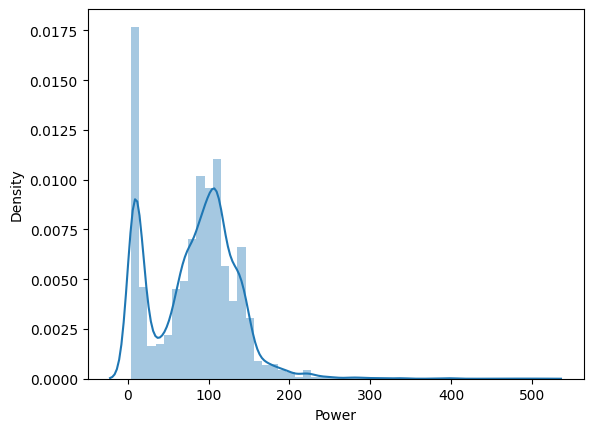

In [206]:
sns.distplot(balanced_insurance['Power'])
plt.show()

/tmp/ipykernel_14901/4202899585.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balanced_insurance['Seniority'])


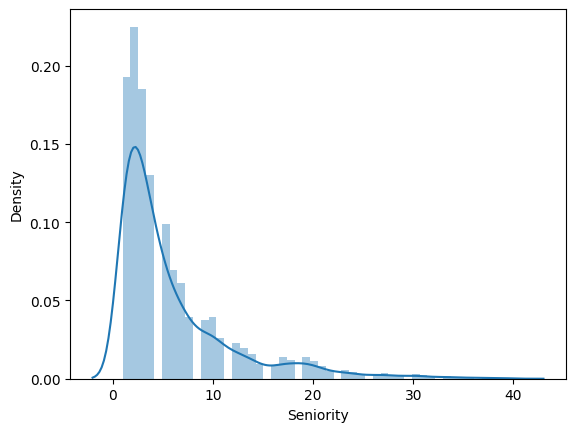

In [207]:
sns.distplot(balanced_insurance['Seniority'])
plt.show()

# Train Test Split

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X = balanced_insurance.drop('Cluster', axis=1)  # Exclude the 'Cluster' column
y = balanced_insurance['Cluster']

In [210]:
X

,Seniority,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Weight
0,5,39,296,5999.00,0,1,174
1,11,27,249,3880.00,0,1,190
2,4,11,125,2930.00,0,1,116
3,2,53,510,8690.00,0,1,123
4,2,15,125,3099.00,0,1,172
...,...,...,...,...,...,...,...
8008,1,60,1124,10690.00,5,1,910
8009,3,80,1360,14510.00,5,2,1089
8010,8,70,1398,13580.00,5,2,1130
8011,2,90,1598,14965.20,5,1,1055


In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [212]:
X_train

,Seniority,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Weight
1272,26,34,148,7500.00,0,1,105
1411,4,100,1170,13700.00,0,1,225
7068,10,90,1560,15899.05,5,2,1289
7323,13,92,1896,25753.37,5,2,1350
1471,1,33,298,4440.00,0,1,193
...,...,...,...,...,...,...,...
5226,3,130,1896,32120.00,4,2,1515
5390,2,75,1248,13200.00,5,1,1035
860,2,37,498,4990.00,0,1,230
7603,4,68,1896,11455.29,5,2,1070


In [213]:
X_test

,Seniority,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Weight
1420,4,71,798,7950.00,0,1,179
1728,4,20,244,4100.00,0,1,185
6615,5,100,1686,19620.00,5,2,1451
4507,1,190,1968,50345.38,5,2,1770
3362,5,85,1997,21383.00,5,2,1940
...,...,...,...,...,...,...,...
6547,5,103,1396,14852.00,3,1,1035
555,5,98,599,7221.00,0,1,183
6752,4,55,1870,11599.53,4,2,1055
1485,2,12,125,3249.00,0,1,127


In [214]:
y_train

1272    0
1411    0
7068    2
7323    2
1471    0
       ..
5226    1
5390    2
860     0
7603    2
7270    2
Name: Cluster, Length: 5609, dtype: int64

In [215]:
y_test

1420    0
1728    0
6615    2
4507    1
3362    1
       ..
6547    2
555     0
6752    2
1485    0
7148    2
Name: Cluster, Length: 2404, dtype: int64

# Scale the features using MinMaxScaler

In [216]:
from sklearn.preprocessing import MinMaxScaler

In [217]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [218]:
X_train

array([[0.65789474, 0.05928854, 0.01469061, ..., 0.        , 0.        ,
        0.00758621],
       [0.07894737, 0.18972332, 0.16634516, ..., 0.        , 0.        ,
        0.02413793],
       [0.23684211, 0.16996047, 0.22421724, ..., 0.83333333, 1.        ,
        0.17089655],
       ...,
       [0.02631579, 0.06521739, 0.0666271 , ..., 0.        , 0.        ,
        0.02482759],
       [0.07894737, 0.12648221, 0.27407627, ..., 0.83333333, 1.        ,
        0.14068966],
       [0.34210526, 0.14031621, 0.19453925, ..., 0.66666667, 1.        ,
        0.13448276]])

# Training Models

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [220]:
# Create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

# Define X_train, y_train, X_test, y_test

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

Logistic Regression - Accuracy: 0.9721, Precision: 0.9727, Recall: 0.9721, F1 Score: 0.9721
Naive Bayes - Accuracy: 0.9617, Precision: 0.9625, Recall: 0.9617, F1 Score: 0.9620
Support Vector Machine - Accuracy: 0.9759, Precision: 0.9767, Recall: 0.9759, F1 Score: 0.9759
K-Nearest Neighbors - Accuracy: 0.9709, Precision: 0.9711, Recall: 0.9709, F1 Score: 0.9709
Decision Tree - Accuracy: 0.9746, Precision: 0.9748, Recall: 0.9746, F1 Score: 0.9746
Random Forest - Accuracy: 0.9834, Precision: 0.9837, Recall: 0.9834, F1 Score: 0.9833
Bagging - Accuracy: 0.9817, Precision: 0.9820, Recall: 0.9817, F1 Score: 0.9817
AdaBoost - Accuracy: 0.9126, Precision: 0.9193, Recall: 0.9126, F1 Score: 0.9119
Gradient Boosting - Accuracy: 0.9888, Precision: 0.9889, Recall: 0.9888, F1 Score: 0.9888
Extra Trees - Accuracy: 0.9592, Precision: 0.9593, Recall: 0.9592, F1 Score: 0.9592


# test stakin model

In [221]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier

In [222]:
level0 = [
    ('AdaBoost', AdaBoostClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier())
]

# Define level1 classifier
level1 = LogisticRegression(max_iter=1000)

# Create StackingClassifier
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#matrix confision
matrix = confusion_matrix(y_test, y_pred)

print(f"Stacking Classifier - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

print(matrix)

Stacking Classifier - Accuracy: 0.9884, Precision: 0.9885, Recall: 0.9884, F1 Score: 0.9884
[[840   0   0]
 [  0 757   5]
 [  0  23 779]]


# Predictive System

In [223]:
balanced_insurance

,Seniority,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Weight,Cluster
0,5,39,296,5999.00,0,1,174,0
1,11,27,249,3880.00,0,1,190,0
2,4,11,125,2930.00,0,1,116,0
3,2,53,510,8690.00,0,1,123,0
4,2,15,125,3099.00,0,1,172,0
...,...,...,...,...,...,...,...,...
8008,1,60,1124,10690.00,5,1,910,2
8009,3,80,1360,14510.00,5,2,1089,2
8010,8,70,1398,13580.00,5,2,1130,2
8011,2,90,1598,14965.20,5,1,1055,2


In [224]:
def recommendation_insurance(Seniority, Power, Cylinder_capacity, Value_vehicle, N_doors, Type_fuel, Weight):
    features = np.array([[Seniority, Power, Cylinder_capacity, Value_vehicle, N_doors, Type_fuel, Weight]])
    transformed_features = scaler.fit_transform(features)
    prediction = model.predict(transformed_features).reshape(1,-1)
    return prediction[0] 
    

In [225]:
pridect = recommendation_insurance(4,39,250,15000,4,1,170)


insurance_dict = {0:'Civil liability insurance',
             1:'Insurance with Damage ' ,
             3:'insurance with all risks'
            }
if pridect[0] in insurance_dict :
    insurnace_type = insurance_dict[predict[0]]
    print('{} is the best insurance for you'.format(insurnace_type ))
else:
    print("Sorry are not able to recommend this ansurance insurnace ")


Civil liability insurance is the best insurance for you
